STEP 1 — LOAD DATASET
Using data: ../input/WatchAlways_customer_churn.csv

STEP 2 — DATASET OVERVIEW
Shape: (5000, 14)
Meaning:
- Rows = 5000 (customers)
- Columns = 14 (features + target)

Columns in dataset:
['customer_id', 'age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'churned', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']

Target variable explanation:
- churned = 1 -> customer canceled subscription (churn)
- churned = 0 -> customer stayed subscribed

So the goal later (in modeling) is to predict churned.


STEP 3 — DATA QUALITY (MISSING VALUES)
No missing values found.
Why this is good:
- We can analyze without cleaning NaNs.
- Later modeling becomes easier.


STEP 4 — CHURN RATE (BENCHMARK METRIC)
Churn rate (full dataset): 0.503 (50.3%)

What churn rate means:
- It is the percentage of customers who canceled.
- This is the CURRENT baseline performance in the dataset.
- The business

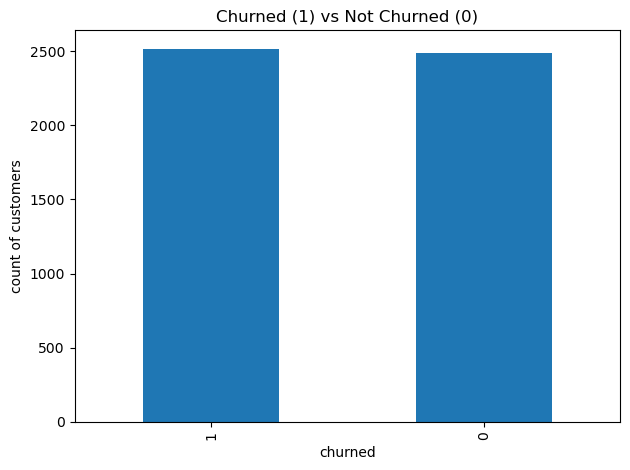


STEP 6 — CHURN BY CUSTOMER SEGMENTS
Now we check if churn differs by groups:
- subscription_type (Basic/Standard/Premium)
- payment_method (credit card, crypto, etc.)
- region, device, favorite genre, gender

This helps WatchAlways understand where churn risk is highest.

--- Segment churn analysis: subscription_type ---
Meaning: for each group, what fraction of customers churned?
subscription_type
Basic       0.618302
Standard    0.454435
Premium     0.437094
Name: churned, dtype: float64


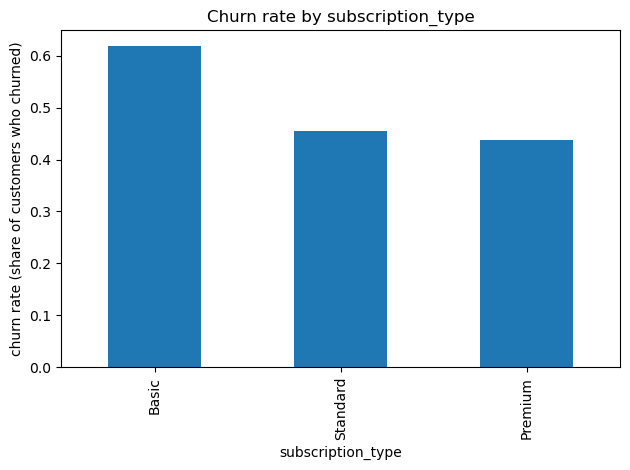


--- Segment churn analysis: payment_method ---
Meaning: for each group, what fraction of customers churned?
payment_method
Crypto         0.596985
Gift Card      0.577869
PayPal         0.470760
Debit Card     0.436893
Credit Card    0.435766
Name: churned, dtype: float64


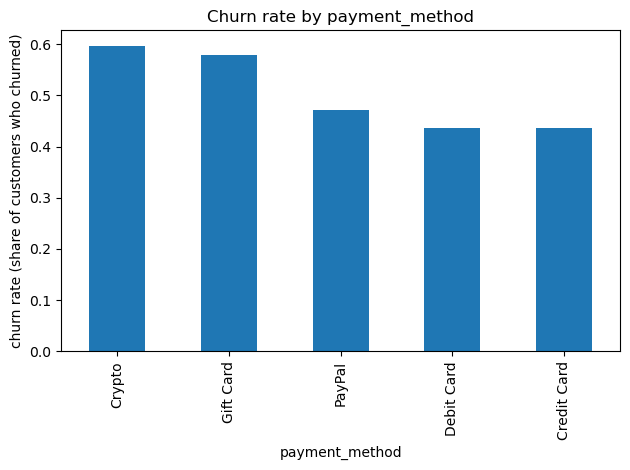


--- Segment churn analysis: region ---
Meaning: for each group, what fraction of customers churned?
region
Europe           0.516724
South America    0.514318
Asia             0.506540
Oceania          0.500654
North America    0.494712
Africa           0.483188
Name: churned, dtype: float64


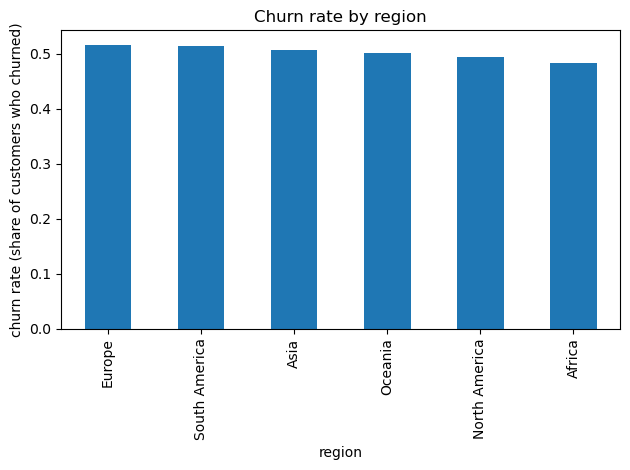


--- Segment churn analysis: device ---
Meaning: for each group, what fraction of customers churned?
device
Laptop     0.517893
Mobile     0.504980
Tablet     0.500000
TV         0.499496
Desktop    0.492097
Name: churned, dtype: float64


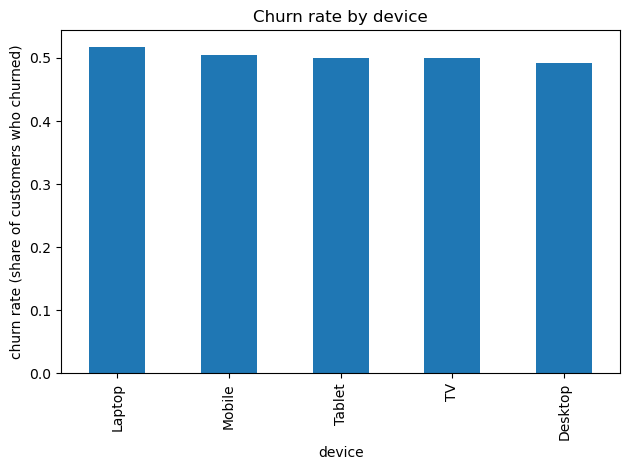


--- Segment churn analysis: favorite_genre ---
Meaning: for each group, what fraction of customers churned?
favorite_genre
Action         0.523673
Drama          0.522572
Horror         0.514727
Documentary    0.507545
Comedy         0.499270
Romance        0.482759
Sci-Fi         0.470833
Name: churned, dtype: float64


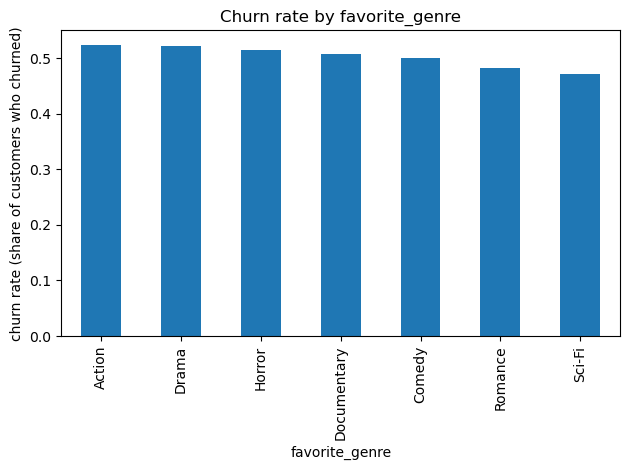


--- Segment churn analysis: gender ---
Meaning: for each group, what fraction of customers churned?
gender
Female    0.510812
Male      0.500000
Other     0.497859
Name: churned, dtype: float64


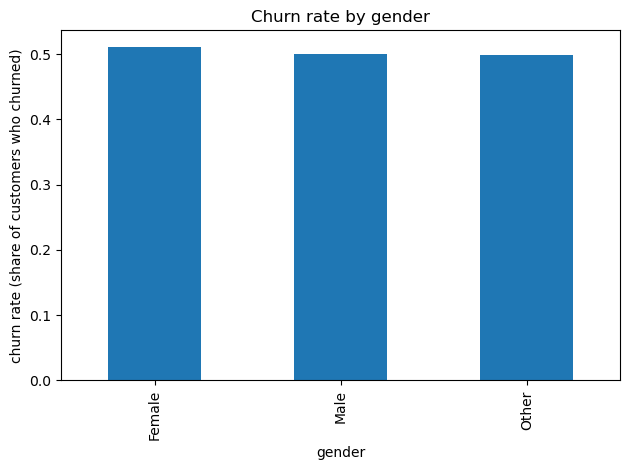


STEP 7 — NUMERIC FEATURES VS CHURN (BOXPLOTS)
We compare engagement/behavior numeric features for churned vs non-churned.
Examples:
- watch_hours and avg_watch_time_per_day measure engagement.
- last_login_days measures inactivity.

If churned users are less engaged, we expect:
- watch_hours lower for churned=1
- avg_watch_time_per_day lower for churned=1
- last_login_days higher for churned=1


Boxplot: watch_hours by churned
We compare churned=0 (stayed) vs churned=1 (churned).
Look for differences in median and spread between the two groups.



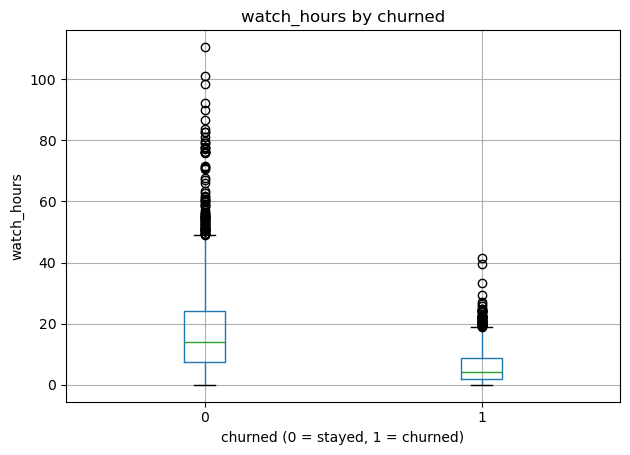


Boxplot: avg_watch_time_per_day by churned
We compare churned=0 (stayed) vs churned=1 (churned).
Look for differences in median and spread between the two groups.



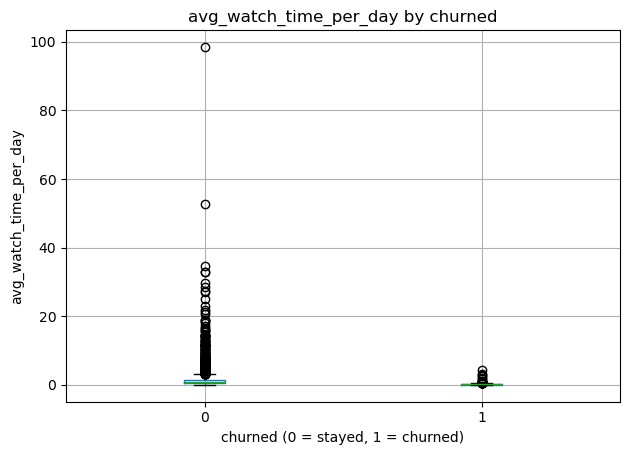


Boxplot: last_login_days by churned
We compare churned=0 (stayed) vs churned=1 (churned).
Look for differences in median and spread between the two groups.



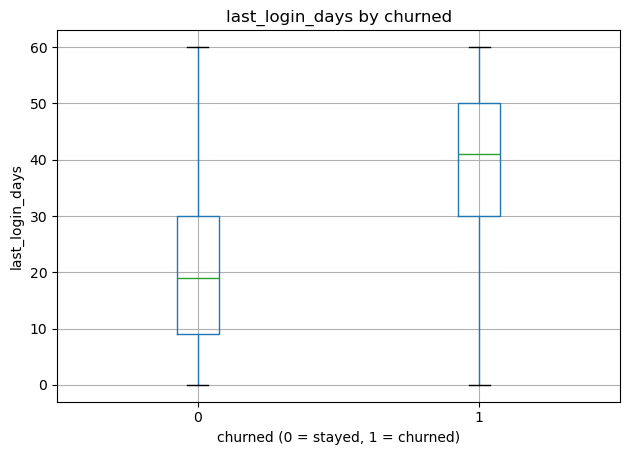


Boxplot: monthly_fee by churned
We compare churned=0 (stayed) vs churned=1 (churned).
Look for differences in median and spread between the two groups.



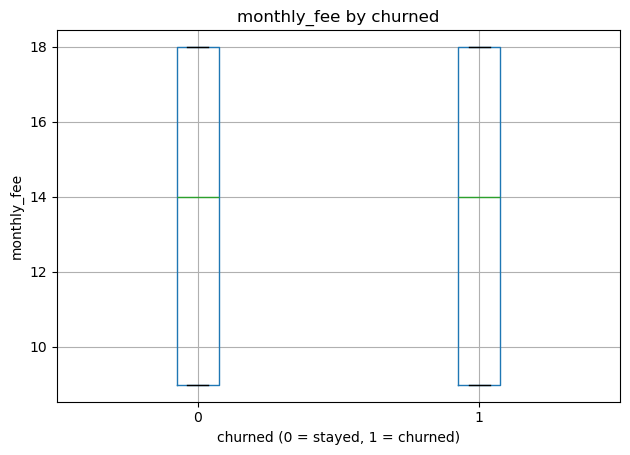


Boxplot: number_of_profiles by churned
We compare churned=0 (stayed) vs churned=1 (churned).
Look for differences in median and spread between the two groups.



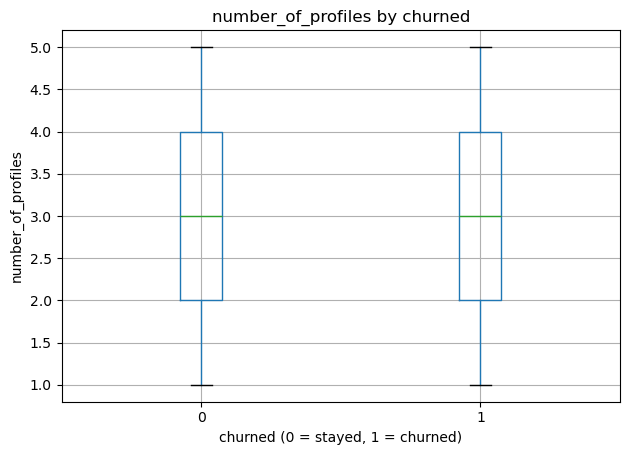


Boxplot: age by churned
We compare churned=0 (stayed) vs churned=1 (churned).
Look for differences in median and spread between the two groups.



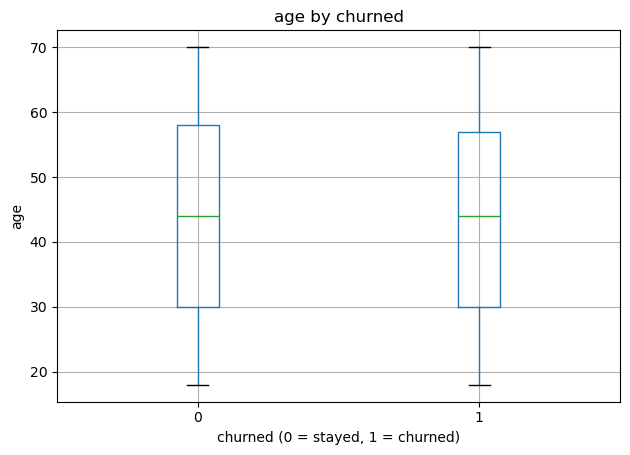


STEP 8 — CORRELATION WITH CHURN
Correlation is a quick summary of linear association.
- Values close to +1: strong positive association (feature increases with churn)
- Values close to -1: strong negative association (feature decreases with churn)
- Values close to 0: weak/no linear association

Important: correlation is NOT causation.
It does not prove the feature causes churn; it only shows they move together.

Correlation with churned:
churned                   1.000000
last_login_days           0.471590
age                      -0.003515
monthly_fee              -0.152117
number_of_profiles       -0.158614
avg_watch_time_per_day   -0.272958
watch_hours              -0.479916
Name: churned, dtype: float64

EDA FINISHED
We have completed the Part 1 EDA requirements:
- dataset loaded and explored
- missing values checked
- churn benchmark computed
- key plots created to understand churn drivers

Next steps (for later project parts): build baseline + ML models (not done here).


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,44f3ba44-b95d-4e50-a786-bac4d06f4a43,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,4.10,Drama
4996,18779bcb-ba2b-41da-b751-e70b812061ec,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,3.08,Documentary
4997,3f32e8c5-615b-4a3b-a864-db2688f7834f,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,0.33,Action
4998,7b0ad82d-6571-430e-90f4-906259e0e89c,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,Credit Card,4,2.28,Sci-Fi


In [4]:
# ============================================
# WATCHALWAYS - PROJECT 1 (PART 1) 
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

df = pd.read_csv("../input/WatchAlways_customer_churn.csv")
# --------------------------------------------
# 1) Plot: churn rate by category
# --------------------------------------------
def churn_rate_by_category(df, col):
    """
    What this does:
    - For a categorical column (e.g., subscription_type), it calculates:
        churn rate = mean(churned)
      because churned is 0/1:
        average of 0/1 is exactly the fraction of 1s.

    Why we do it:
    - It helps identify "high-risk segments".
    - Example: if Basic plan churn rate is much higher than Premium,
      then Basic users are a target for retention campaigns.

    How to interpret:
    - churn rate is between 0 and 1.
    - 0.62 means 62% churned in that group.
    - A big difference between groups suggests that feature may matter for churn.
    """
    if col not in df.columns:
        return

    rates = df.groupby(col)["churned"].mean().sort_values(ascending=False)

    print(f"\n--- Segment churn analysis: {col} ---")
    print("Meaning: for each group, what fraction of customers churned?")
    print(rates)

    # Bar chart: easier to compare groups visually
    rates.plot(kind="bar")
    plt.title(f"Churn rate by {col}")
    plt.ylabel("churn rate (share of customers who churned)")
    plt.tight_layout()
    plt.show()


# --------------------------------------------
# 2) plot: boxplot for numeric feature by churn
# --------------------------------------------
def boxplot_by_churn(df, col):
    """
    What this does:
    - Creates a boxplot of a numeric column split by churned (0 vs 1).

    Why boxplots are useful in EDA:
    - They quickly compare the distribution of a feature across two groups.
    - We can see differences in:
        * median (typical value)
        * spread/variability
        * outliers

    How to read a boxplot (simple):
    - The thick line inside the box = MEDIAN (middle value).
    - The box = middle 50% of the data (25th to 75th percentile).
    - The whiskers = range of typical values (excluding extreme outliers).
    - Points beyond whiskers = outliers (very unusual values).

    How to interpret for churn:
    - If churned=1 has LOWER watch_hours:
        customers who churn tend to watch less -> disengagement signal.
    - If churned=1 has HIGHER last_login_days:
        customers who churn tend to log in less recently -> disengagement signal.
    - If the boxes overlap heavily:
        feature may not separate churn and non-churn well.
    """
    if col not in df.columns:
        return

    print(f"\nBoxplot: {col} by churned")
    print("We compare churned=0 (stayed) vs churned=1 (churned).")
    print("Look for differences in median and spread between the two groups.\n")

    df.boxplot(column=col, by="churned")
    plt.title(f"{col} by churned")
    plt.suptitle("")
    plt.xlabel("churned (0 = stayed, 1 = churned)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


# --------------------------------------------
# 3) Main EDA function
# --------------------------------------------
def run_eda(data_path=None):
    # Step 1: Load dataset 
    data_path = resolve_data_path(data_path)
    print("====================================")
    print("STEP 1 — LOAD DATASET")
    print("====================================")
    print("Using data:", data_path)

    df = pd.read_csv(data_path)

    # Step 2: Explore dataset size + columns 
    print("\n====================================")
    print("STEP 2 — DATASET OVERVIEW")
    print("====================================")
    print("Shape:", df.shape)
    print(
        "Meaning:\n"
        "- Rows =", df.shape[0], "(customers)\n"
        "- Columns =", df.shape[1], "(features + target)\n"
    )

    print("Columns in dataset:")
    print(df.columns.tolist())

    print(
        "\nTarget variable explanation:\n"
        "- churned = 1 -> customer canceled subscription (churn)\n"
        "- churned = 0 -> customer stayed subscribed\n"
        "\nSo the goal later (in modeling) is to predict churned.\n"
    )

    # Step 3: Missing values check 
    print("\n====================================")
    print("STEP 3 — DATA QUALITY (MISSING VALUES)")
    print("====================================")
    missing = df.isna().sum().sort_values(ascending=False)

    if (missing > 0).any():
        print("Missing values found:")
        print(missing[missing > 0])

        print(
            "\nWhy missing values matter:\n"
            "- Missing values can bias analysis and break ML models later.\n"
            "- In later steps, we would fill missing values or drop rows/columns.\n"
        )
    else:
        print("No missing values found.")
        print(
            "Why this is good:\n"
            "- We can analyze without cleaning NaNs.\n"
            "- Later modeling becomes easier.\n"
        )

    # Step 4: Compute churn rate benchmark 
    print("\n====================================")
    print("STEP 4 — CHURN RATE (BENCHMARK METRIC)")
    print("====================================")

    if "churned" not in df.columns:
        raise ValueError("Column 'churned' not found in dataset.")

    churn_rate = df["churned"].mean()
    print(f"Churn rate (full dataset): {churn_rate:.3f} ({churn_rate*100:.1f}%)")

    print(
        "\nWhat churn rate means:\n"
        "- It is the percentage of customers who canceled.\n"
        "- This is the CURRENT baseline performance in the dataset.\n"
        "- The business wants to reduce this number.\n"
        "\nHow churn rate can change in real life:\n"
        "- Better content & recommendations -> higher engagement -> lower churn.\n"
        "- Bad onboarding / users not finding content -> disengagement -> higher churn.\n"
        "- Payment friction (gift cards/crypto) could increase churn.\n"
    )

    # Step 5: Visualize churn distribution 
    print("\n====================================")
    print("STEP 5 — CHURN DISTRIBUTION PLOT")
    print("====================================")
    print(
        "This bar chart shows how many customers churned vs stayed.\n"
        "If counts are similar, the dataset is balanced.\n"
        "Balanced data is generally easier for ML later."
    )

    df["churned"].value_counts().plot(kind="bar")
    plt.title("Churned (1) vs Not Churned (0)")
    plt.xlabel("churned")
    plt.ylabel("count of customers")
    plt.tight_layout()
    plt.show()

    # Step 6: Churn by key segments 
    print("\n====================================")
    print("STEP 6 — CHURN BY CUSTOMER SEGMENTS")
    print("====================================")
    print(
        "Now we check if churn differs by groups:\n"
        "- subscription_type (Basic/Standard/Premium)\n"
        "- payment_method (credit card, crypto, etc.)\n"
        "- region, device, favorite genre, gender\n"
        "\nThis helps WatchAlways understand where churn risk is highest."
    )

    cat_cols = ["subscription_type", "payment_method", "region", "device", "favorite_genre", "gender"]
    for c in cat_cols:
        churn_rate_by_category(df, c)

    # Step 7: Numeric behavior features vs churn 
    print("\n====================================")
    print("STEP 7 — NUMERIC FEATURES VS CHURN (BOXPLOTS)")
    print("====================================")
    print(
        "We compare engagement/behavior numeric features for churned vs non-churned.\n"
        "Examples:\n"
        "- watch_hours and avg_watch_time_per_day measure engagement.\n"
        "- last_login_days measures inactivity.\n"
        "\nIf churned users are less engaged, we expect:\n"
        "- watch_hours lower for churned=1\n"
        "- avg_watch_time_per_day lower for churned=1\n"
        "- last_login_days higher for churned=1\n"
    )

    numeric_cols = [
        "watch_hours",
        "avg_watch_time_per_day",
        "last_login_days",
        "monthly_fee",
        "number_of_profiles",
        "age",
    ]

    for col in numeric_cols:
        boxplot_by_churn(df, col)

    # Step 8: Correlation 
    print("\n====================================")
    print("STEP 8 — CORRELATION WITH CHURN")
    print("====================================")
    print(
        "Correlation is a quick summary of linear association.\n"
        "- Values close to +1: strong positive association (feature increases with churn)\n"
        "- Values close to -1: strong negative association (feature decreases with churn)\n"
        "- Values close to 0: weak/no linear association\n"
        "\nImportant: correlation is NOT causation.\n"
        "It does not prove the feature causes churn; it only shows they move together.\n"
    )

    num_present = [c for c in numeric_cols if c in df.columns]
    if len(num_present) > 0:
        corr = df[num_present + ["churned"]].corr(numeric_only=True)
        print("Correlation with churned:")
        print(corr["churned"].sort_values(ascending=False))

    print("\n====================================")
    print("EDA FINISHED")
    print("====================================")
    print(
        "We have completed the Part 1 EDA requirements:\n"
        "- dataset loaded and explored\n"
        "- missing values checked\n"
        "- churn benchmark computed\n"
        "- key plots created to understand churn drivers\n"
        "\nNext steps (for later project parts): build baseline + ML models (not done here)."
    )

    return df


# --------------------------------------------
# Run EDA (Notebook)
# --------------------------------------------
# We call run_eda() so outputs and graphs appear inside the notebook.
run_eda("../input/WatchAlways_customer_churn.csv")
